<a href="https://colab.research.google.com/github/4juneko/Aiffel_work/blob/master/14_CV_embedding_05222023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rubric
|평가문항|	상세기준|내 평가|
|--|--|--|
|1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.|	닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.|O|
|2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.|다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.|O|
|3. 다양하고 재미있는 결과 시각화를 시도하였다.	|matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다.|O|

# Import Module & Prepare Image
- 모듈 준비
- 이미지를 모아둔 zip 파일 압축 풀기
- 마지막 과정에서 png 파일이 출력 안되는 문제가 있어 jpg 파일로 저장

In [ ]:
pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 54.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import face_recognition
import numpy as np
import PIL
from PIL import Image

print(face_recognition.__version__)
print(np.__version__)
print(PIL.__version__)

1.2.3
1.22.2
8.3.2


In [ ]:
import zipfile
import os

import matplotlib.pyplot as plt
import matplotlib.image as img

In [ ]:
zip_file = zipfile.ZipFile(os.getenv("HOME") + '/aiffel/05222023/celebrity.zip')
# os.makedirs(os.getenv("HOME") + '/aiffel/05222023/celebrity')
new_dir = os.getenv("HOME") + '/aiffel/05222023/celebrity'
zip_file.extractall(new_dir)

In [ ]:
dir_path = os.getenv('HOME')+'/aiffel/05222023/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['무라니시.png', '존 파브르.jpeg', '리암 니슨.png', '황정민.jpg', '조달환.png', '도아.jpeg', '하정우.jpg', '길.jpg', '잇지유나.jpg', '손호준.jpeg', '박정민.jpg', '김C.jpeg', '개코.jpeg', '유아.jpg', '트와이스사나.jpg', '박찬욱.jpeg', '윤도현.png', '류현진.jpg', '서장훈.jpg', '우기.jpg', '철면수심.jpg', '박신양.png', '찬열.jpeg', '권태원.jpeg', '유재석.jpg', '봉준호.jpg', '온앤오프라운.jpg', '곽도원.jpg', '슬리피.jpg', '박완규.png', '박찬호.jpg', '백윤식.png', '아이린.jpeg', '이경규.jpeg', '슬기.jpg', '차두리.jpeg', '정우성.jpeg', '장원준.jpeg', '피어스 브로스넌.jpg', '박명수.jpg', '백현.jpg', '김종서.jpg', '성룡.jpg', '박재범.jpg', '12.jpg', '노무현.jpeg', '류준열.jpg', '김광현.jpg', '야마다 타카유키.jpeg', '이대호.jpeg', '차승원.jpg', '트와이스다현.jpeg', '홍구.jpg', '리아.jpg', '김대중.jpg', '이동국.jpeg', 'b1a4진영.jpeg', '문별.jpg', '이제훈.jpeg', '아이즈원김채원.jpg', 'obama.jpg', '방시혁.jpeg', '공효진.jpg', '박항서.jpg', '강미나.jpg', '윤경신.jpg', '딕헌터.jpeg', '정형돈.jpg', '박보검.jpg', '권현빈.jpg', '이근대위.jpeg', '이희준.jpg', '이진호.jpeg', '잭 갤리퍼내키스.jpg', '제니.jpg', '공유.jpg', '트와이스정연.jpg', '슈퍼비.jpeg', '이말년.png', '김민재.jpeg', '노홍철.jpeg', '채연.jpg', '레오나르도 디카프리오.jpeg', '켄 정.jpeg', '

In [ ]:
import os

import glob
from PIL import Image


!apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.8.0-1).
The following packages were automatically installed and are no longer required:
  accountsservice-ubuntu-schemas bc bluez-obexd cups cups-browsed cups-client
  cups-common cups-core-drivers cups-daemon cups-filters
  cups-filters-core-drivers cups-ipp-utils cups-ppdc cups-server-common
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript
  gir1.2-dbusmenu-glib-0.4 gnome-bluetooth gnome-power-manager
  gnome-screensaver gsettings-ubuntu-schemas gvfs-backends indicator-applet
  indicator-application indicator-appmenu indicator-bluetooth indicator-common
  indicator-datetime indicator-keyboard indicator-messages indicator-power
  indicator-printers indicator-session indicator-sound jayatana
  libaccounts-glib0 libbamf3-2 libcdio-cdda2 libcdio-paranoia2 libcdio18
  libcupsfilters1 libfcitx-config4 libfcitx-gclient1 libfcitx-utils0
  li

In [ ]:
# png to jpg
# 결과 출력할 때 png 파일이 출력이 안되어서
def convert_png_to_jpg(path):
    # jpg파일을 저장하기 위한 디렉토리의 생성
#     if not os.path.exists(path+'_jpg'):
#         os.mkdir(path+'_jpg') 

    # 모든 png 파일의 절대경로를 저장
    all_image_files=glob.glob(path+'/*.png') 

    for file_path in all_image_files:                   # 모든 png파일 경로에 대하여
        img = Image.open(file_path).convert('RGB')  # 이미지를 불러온다.

        directories=file_path.split('/')                # 절대경로상의 모든 디렉토리를 얻어낸다.
#         directories[-2]+='_jpg'                     # 저장될 디렉토리의 이름 지정
        directories[-1]=directories[-1][:-4]+'.jpg'  # 저장될 파일의 이름 지정
        save_filepath='/'.join(directories)          # 절대경로명으로 바꾸기
        img.save(save_filepath, quality=100)       # jpg파일로 저장한다.
        os.remove(file_path)            # png 파일 지우기       
# https://dacon.io/codeshare/1704

In [ ]:
path= os.getenv('HOME')+'/aiffel/05222023/celebrity'
convert_png_to_jpg(path)

# Resize
- 해상도가 많이 큰 이미지의 경우 crop이 안되는 경우가 있어 사이즈를 줄이는 과정을 추가함.

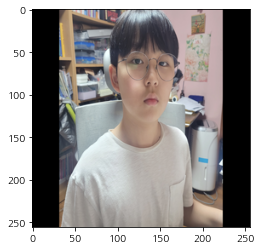

In [ ]:
img = os.getenv('HOME')+'/aiffel/05222023/celebrity/13.jpg'
old_img = Image.open(img)
old_img = old_img.rotate(270)
plt.imshow(old_img)
# old_img.save(img)

target_size=(256,256)
new_img=old_img.resize(target_size,Image.ANTIALIAS)
new_img.save(img)
plt.imshow(new_img)

# 내 사진은 '11.jpg', '12.jpg'
# crop 실행 시 list index out of range 에러가 나와 사진 사이즈를 줄였더니 에러가 없어짐.

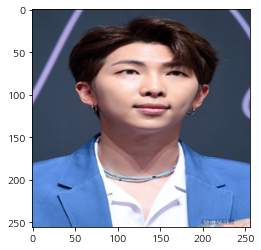

In [ ]:
img = os.getenv('HOME')+'/aiffel/05222023/celebrity/RM.jpg'
old_img = Image.open(img)
# old_img = old_img.rotate(270)
plt.imshow(old_img)
# old_img.save(img)

target_size=(256,256)
new_img=old_img.resize(target_size,Image.ANTIALIAS)
new_img.save(img)
plt.imshow(new_img)

# favorite

In [ ]:
import shutil
shutil.rmtree(os.getenv("HOME") + '/aiffel/05222023/celebrity/.ipynb_checkpoints')

# 에러 생긴 후에 어김없이 나타나는 '.ipynb_checkpoints' 자꾸 이럴래?

In [ ]:
from pathlib import Path

dir_path = os.getenv('HOME')+'/aiffel/05222023/celebrity'
file_list = os.listdir(dir_path)
print(len(file_list))
print(file_list)
target_size=(256,256)
d=0
for file in file_list:
    print(d)
    d+=1
    print(file)
    image_file = os.path.join(dir_path, file) 
    old_img = Image.open(image_file)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img=new_img.convert('RGB')
    new_img.save(image_file)
    
# 혹시 사이즈 문제일까 해봄.     

281
['무라니시.png', '존 파브르.jpeg', '리암 니슨.png', '황정민.jpg', '조달환.png', '도아.jpeg', '하정우.jpg', '길.jpg', '잇지유나.jpg', '손호준.jpeg', '박정민.jpg', '김C.jpeg', '개코.jpeg', '유아.jpg', '트와이스사나.jpg', '박찬욱.jpeg', '윤도현.png', '류현진.jpg', '서장훈.jpg', '우기.jpg', '철면수심.jpg', '박신양.png', '찬열.jpeg', '권태원.jpeg', '유재석.jpg', '봉준호.jpg', '온앤오프라운.jpg', '곽도원.jpg', '슬리피.jpg', '박완규.png', '박찬호.jpg', '백윤식.png', '아이린.jpeg', '이경규.jpeg', '슬기.jpg', '차두리.jpeg', '정우성.jpeg', '장원준.jpeg', '피어스 브로스넌.jpg', '박명수.jpg', '백현.jpg', '김종서.jpg', '성룡.jpg', '박재범.jpg', '노무현.jpeg', '류준열.jpg', '김광현.jpg', '야마다 타카유키.jpeg', '이대호.jpeg', '차승원.jpg', '트와이스다현.jpeg', '홍구.jpg', '리아.jpg', '김대중.jpg', '이동국.jpeg', 'b1a4진영.jpeg', '문별.jpg', '이제훈.jpeg', '아이즈원김채원.jpg', 'obama.jpg', '방시혁.jpeg', '공효진.jpg', '박항서.jpg', '강미나.jpg', '윤경신.jpg', '딕헌터.jpeg', '정형돈.jpg', '박보검.jpg', '권현빈.jpg', '이근대위.jpeg', '이희준.jpg', '이진호.jpeg', '잭 갤리퍼내키스.jpg', '제니.jpg', '공유.jpg', '트와이스정연.jpg', '슈퍼비.jpeg', '이말년.png', '김민재.jpeg', '노홍철.jpeg', '채연.jpg', '레오나르도 디카프리오.jpeg', '켄 정.jpeg', '잇지예지.jpeg', '뷔.pn

In [ ]:
resize_images

# Crop

In [ ]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    cropped_image = Image.fromarray(cropped_face, 'RGB')
    return cropped_face, cropped_image

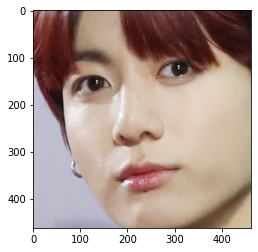

In [ ]:
image_path = os.getenv('HOME')+'/aiffel/05222023/celebrity/정국2.jpg'
save_path = os.getenv('HOME')+'/aiffel/05222023/celebrity2/정국2.jpg'

error_face, error_image = get_cropped_face(image_path)
error_image.save(save_path)
plt.imshow(error_image)

# 산들은 crop이 안되는데 목까지 올라오는 옷 때문일까? 정확한 이유 파악 안됨.

# Embedding

In [ ]:
# image_file = os.path.join(dir_path, 'obama.jpg')
# face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    cropped_image = Image.fromarray(cropped_face, 'RGB') # 그림 파일로 저장하기 위해
    return cropped_face, cropped_image

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)



In [ ]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    print(len(file_list))
    embedding_dict = {}
    d=0
    
    for file in file_list:
        if os.path.isdir(file) :         # '.ipynb_checkpoints'에서 error가 생겨 그냥 넘김.
            continue 
        print(d)
        d+=1
        print(file)
        image_file = os.path.join(dir_path, file)   
        face, face_image = get_cropped_face(image_file) #crop
        
        save_file = os.path.join(os.getenv("HOME") + '/aiffel/05222023/celebrity2/', file)
        face_image.save(save_file)  #save cropped_image in celebrity2 directory
        
        embedding = get_face_embedding(face)  #embedding

        if len(embedding) > 0:
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            
    return embedding_dict

In [ ]:
os.makedirs(os.getenv("HOME") + '/aiffel/05222023/celebrity2')

In [ ]:
dir_path = os.getenv("HOME") + '/aiffel/05222023/celebrity/'
embedding_dict = get_face_embedding_dict(dir_path)

287
0
존 파브르.jpeg
1
황정민.jpg
2
도아.jpeg
3
하정우.jpg
4
길.jpg
5
잇지유나.jpg
6
손호준.jpeg
7
박정민.jpg
8
김C.jpeg
9
개코.jpeg
10
유아.jpg
11
트와이스사나.jpg
12
박찬욱.jpeg
13
줄리엔강.jpg
14
류현진.jpg
15
서장훈.jpg
16
우기.jpg
17
철면수심.jpg
18
찬열.jpeg
19
권태원.jpeg
20
유재석.jpg
21
봉준호.jpg
22
온앤오프라운.jpg
23
곽도원.jpg
24
슬리피.jpg
25
박찬호.jpg
26
아이린.jpeg
27
이경규.jpeg
28
슬기.jpg
29
차두리.jpeg
30
정우성.jpeg
31
장원준.jpeg
32
피어스 브로스넌.jpg
33
박명수.jpg
34
백현.jpg
35
김종서.jpg
36
성룡.jpg
37
박재범.jpg
38
12.jpg
39
노무현.jpeg
40
류준열.jpg
41
김광현.jpg
42
야마다 타카유키.jpeg
43
이대호.jpeg
44
차승원.jpg
45
트와이스다현.jpeg
46
홍구.jpg
47
리아.jpg
48
리암 니슨.jpg
49
김대중.jpg
50
이동국.jpeg
51
b1a4진영.jpeg
52
문별.jpg
53
이제훈.jpeg
54
아이즈원김채원.jpg
55
obama.jpg
56
박완규.jpg
57
방시혁.jpeg
58
공효진.jpg
59
박항서.jpg
60
강미나.jpg
61
윤경신.jpg
62
딕헌터.jpeg
63
정형돈.jpg
64
박보검.jpg
65
권현빈.jpg
66
이근대위.jpeg
67
이희준.jpg
68
이진호.jpeg
69
잭 갤리퍼내키스.jpg
70
제니.jpg
71
공유.jpg
72
트와이스정연.jpg
73
슈퍼비.jpeg
74
김민재.jpeg
75
노홍철.jpeg
76
채연.jpg
77
레오나르도 디카프리오.jpeg
78
켄 정.jpeg
79
잇지예지.jpeg
80
잭 스페이더.jpeg
81
대도서관.jpeg
82
류승룡.jpeg
83
이민호.jpeg
84
김구라.jp

In [ ]:
file_list = os.listdir(os.getenv("HOME") + '/aiffel/05222023/celebrity2')
print(len(file_list))

287


In [ ]:
# import shutil
# shutil.rmtree(os.getenv("HOME") + '/aiffel/05222023/celebrity2/')

In [ ]:
# def get_face_embedding_dict2(dir_path):
#     file_list = os.listdir(dir_path)
#     embedding_dict = {}
#     d=0
#     for file in file_list:
#         print(file)
#         image_file = os.path.join(dir_path, file)
#         image = face_recognition.load_image_file(image_file)
# #         face = Image.fromarray(image_file, 'RGB')
# #         face, face_image = get_cropped_face(image_file) #crop
        
# #         save_file = os.path.join(os.getenv("HOME") + '/aiffel/05222023/celebrity2/', file)
# #         face_image.save(save_file)  #save cropped_image
        
#         embedding = get_face_embedding(image)  #embedding
#         print(d)
#         d+=1
#         if len(embedding) > 0:
#             embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            
#     return embedding_dict

In [ ]:
# dir_path = os.getenv("HOME") + '/aiffel/05222023/celebrity2/'
# embedding_dict = get_face_embedding_dict2(dir_path)


In [ ]:
#embedding_dict # double check

In [ ]:
len(embedding_dict) # double check 8개 사진이 날라가버렸..

278

In [ ]:
import pickle
with open('embedding_dict.p', 'wb') as f:
    pickle.dump(embedding_dict, f)
    
# 자원 절약을 위해 'embedding_dict' 를 파일로 저장

In [ ]:
import pickle
with open('embedding_dict.p', 'rb') as f:
    embedding_dict = pickle.load(f)
    

In [ ]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [ ]:
embedding_dict['11']

array([-0.08441387,  0.00219274,  0.0485481 , -0.05490911, -0.07444721,
       -0.0863281 , -0.06437274, -0.10620896,  0.14181937, -0.09820094,
        0.10769343, -0.08431248, -0.18204911, -0.0372003 , -0.0654317 ,
        0.19458827, -0.13465329, -0.13274972, -0.08112632,  0.03058413,
        0.0791584 , -0.02297612,  0.00077338,  0.04450972, -0.05997673,
       -0.31151479, -0.11175235, -0.04921204,  0.00676908, -0.0299969 ,
       -0.04670383,  0.05142779, -0.14798805, -0.03268665,  0.05531039,
        0.08355741, -0.03866592, -0.08434954,  0.17463672, -0.02158498,
       -0.30219007,  0.02033703,  0.08952477,  0.20118317,  0.17622022,
        0.06860434,  0.02168254, -0.15283687,  0.13287607, -0.14068425,
        0.00596344,  0.14259759,  0.10708085,  0.08732596,  0.04500513,
       -0.12603317,  0.10130873,  0.09598809, -0.15656686,  0.01533353,
        0.1089913 , -0.06492842, -0.04027556, -0.06883403,  0.19884098,
        0.05604518, -0.12678856, -0.17612982,  0.16328295, -0.15

In [ ]:
get_distance('정국2','사야')

0.43365446212423725

In [ ]:
get_distance('12','11')
# 내 사진끼리 거리. 동일 인물의 경우 0.32 정도 나오나 봄.

0.3177371249258032

In [ ]:
get_distance('13','12')
# 지후랑 나랑

0.4824643973976521

In [ ]:
# 닮은 꼴 출력시 한글 출력을 위해
import koreanize_matplotlib

In [ ]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('11')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

def get_nearest_face(name, top=6):
    dir_path = os.getenv("HOME") + '/aiffel/05222023/celebrity/'
    
    # 기준 이미지 출력
    for extension in ['.jpg', '.jpeg', '.png']:
        image_path = os.path.join(dir_path, name + extension) # 이미지 파일 경로

        if os.path.exists(image_path):
            image = plt.imread(image_path) # 이미지 파일 읽어오기
            break
    plt.title(name)
    plt.axis('off')
    plt.imshow(image)
    
    # 닮은 사람 리스트와 이미지 출력
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    fig, ax = plt.subplots(2,3, figsize=(13,13))
    
    for i in range(top+1):
        if i < 1 :   # 바로 그 사진 파일 제외 
            continue
        
        if sorted_faces[i]:
            
            distance = round(sort_key_func(sorted_faces[i][0]),4)
            name = sorted_faces[i][0]
            
            for extension in ['.jpg', '.jpeg', '.png']:
                face_image_path = os.path.join(dir_path, sorted_faces[i][0] + extension) # 이미지 파일 경로

                if os.path.exists(face_image_path):
                    face_image = plt.imread(face_image_path) # 이미지 파일 읽어오기
                    break
            j = 'ax' + str(i)        
            j = ax[(i-1)//3,i%3-1]
            j.axis('off')
            j.imshow(face_image)
            j.set_title('순위 {} : 이름({}), 거리({})'.format(i, name ,distance))

    plt.show()
            
            
            
# 내 사진이 2개 이므로 top2까지 print 안함.
def get_nearest_myFace(name, top=7):
    dir_path = os.getenv("HOME") + '/aiffel/05222023/celebrity/'
    for extension in ['.jpg', '.jpeg', '.png']:
        image_path = os.path.join(dir_path, name + extension) # 이미지 파일 경로

        if os.path.exists(image_path):
            image = plt.imread(image_path) # 이미지 파일 읽어오기
            break
    plt.title(name)
    plt.axis('off')
    plt.imshow(image)
    
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    fig, ax = plt.subplots(2,3, figsize=(13,13))
    
    for i in range(top+1):
        if i < 2 :   # 바로 그 파일과 또 다른 내 사진 파일 제외 
            continue
        
        
        if sorted_faces[i]:
            
            distance = round(sort_key_func(sorted_faces[i][0]),4)
            name = sorted_faces[i][0]
            
            for extension in ['.jpg', '.jpeg', '.png']:
                face_image_path = os.path.join(dir_path, sorted_faces[i][0] + extension) # 이미지 파일 경로

                if os.path.exists(face_image_path):
                    face_image = plt.imread(face_image_path) # 이미지 파일 읽어오기
                    break
            j = 'ax' + str(i)        
            j = ax[(i-2)//3,i%3-2]
            j.axis('off')
            j.imshow(face_image)
            j.set_title('순위 {} : 이름({}), 거리({})'.format(i-1, name ,distance))
    plt.axis('off')
    plt.show()

# Evaluation

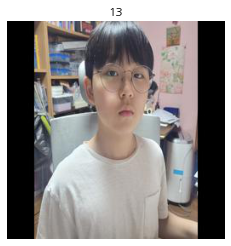

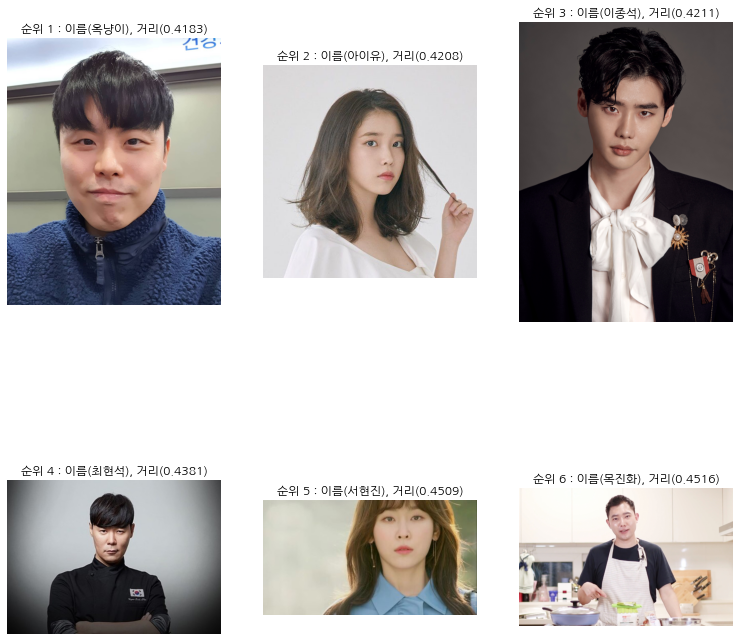

In [ ]:
get_nearest_face('13')

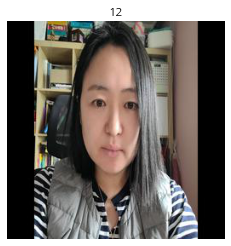

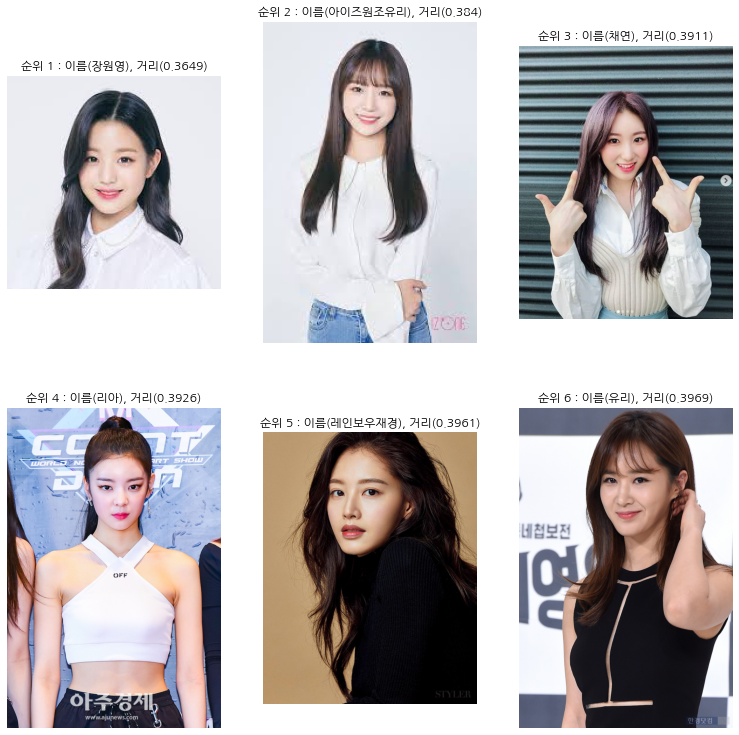

In [ ]:
get_nearest_myFace('12')

# Good Job~

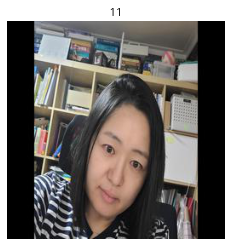

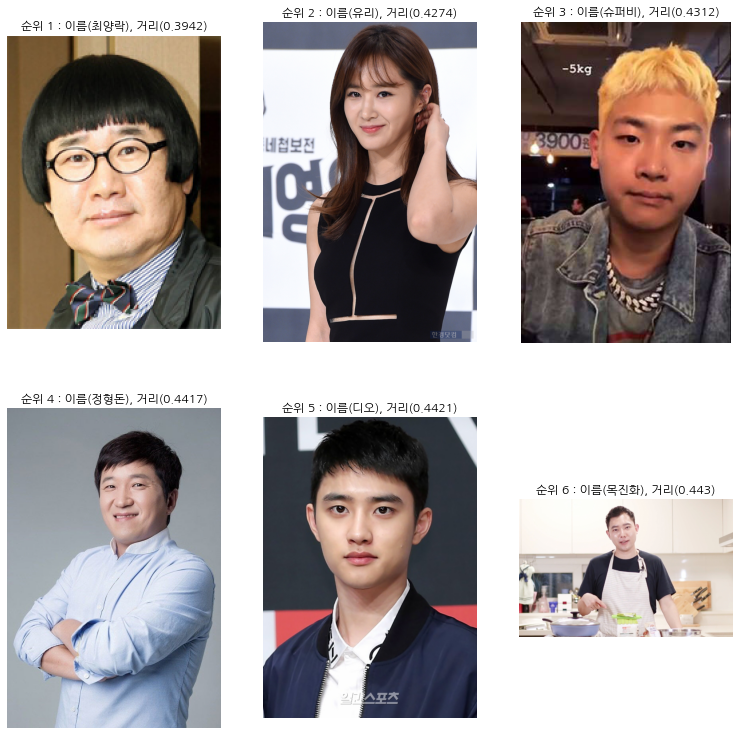

In [ ]:
get_nearest_myFace('11')

# What!!!!!

# Review
- 여러 사진을 모으는 작업을 하지 않고 프로젝트를 진행하여 많이 수월했음.  
  사진 모으는 작업을 경험하는 것도 나쁘지 않을 거 같음.
- crop을 하는 중에 사이즈가 많이 큰 이미지가 안되는 것을 깨닫는 데 시간이 좀 걸림. 
- 산들 이미지가 crop이 안되는 것이 왜 그런지 원인을 찾지 못했음. 얼굴 각도의 문제인 거 같지는 않음.
- crop까지 된 이미지 8개가 embedding이 되지 않음. 이 원인도 잘 모르겠음.
- crop된 이미지는 따로 저장하였는데 프로젝트 끝까지 사용할 일이 없었음.
- 프로젝트 수행 중 실행 파일을 열 때마다 embedding을 해야하는 수고로움을 피하고자 embedding 파일을 저장하였는데 성공. 
- 이미지를 추가할 때마다 embedding을 모두 새로해야하는 것이 불편했음. 추가한 이미지만 embedding할 수 있는 것이 필요함.  
- 내 사진 2개의 거리가 0.32 정도.   
  나의 아이와의 거리는 0.48.  
  장원영과의 거리는 0.36  
  장원영이 딸? ㅋㅋ
- 내 이미지가 2개이여서 2개를 실행했는데 전혀 다른 결과가 나왔음. What!!  이 결과로 이 프로젝트를 신뢰할 수 없게 됨. 